In [1]:
import numpy as np

np.random.seed(1337)  # for reproducibility
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,f1_score,precision_score
from sklearn.metrics import cohen_kappa_score,hamming_loss,precision_recall_curve
from sklearn.metrics import roc_curve,auc
#分类报告
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from dbn.tensorflow import SupervisedDBNClassification
import  tensorflow
import  pandas as pd
#import eli5
#from eli5.sklearn import PermutationImportance
#import shap
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
print(tensorflow.__version__)

1.8.0


In [2]:
# Loading dataset
# digits = load_digits()
# X, Y = digits.data, digits.target
data = pd.read_csv(r'train4.csv',sep=',')
#data_= pd.read_csv(r'test.csv',sep=',')
#导入数据
label_index = 7
dim  = 7
# data[label_index] = data[label_index].map({1:1, 2:-1})
data = data.sample(frac=1.0)
data = data.reset_index()
x = data.drop(['landslide'],axis=1)
print(x.shape)
x = x.drop(['index'],axis=1)
x = np.array(x)
print(x.shape)
std=MinMaxScaler((0,1))
x=std.fit_transform(x)
y = data['landslide']
y = pd.to_numeric( y, errors='coerce').fillna('0').astype('int32')
# Data scaling
# X = (X / 16).astype(np.float32)

(1770, 10)
(1770, 9)


In [ ]:
#test
data_= pd.read_csv(r'test4.csv',sep=',')
data_.dropna(inplace=True)
#导入数据
data_ = data_.sample(frac=1.0)
data_ = data_.reset_index()
x_ = data_.drop(['landslide'],axis=1)
x_ = x_.drop(['index'],axis=1)
x_ = x_.drop(['pre1'],axis=1)
x_ = np.array(x_)
res=x_
print(x_.shape)
std=MinMaxScaler((0,1))
x_=std.fit_transform(x_)
y_ = data_['landslide']
y_ = pd.to_numeric( y_, errors='coerce').fillna('0').astype('int32')

In [3]:
# Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)#random_state=0
# Training
classifier = SupervisedDBNClassification(hidden_layers_structure=[100, 100],
                                         learning_rate_rbm=0.07, 
                                         learning_rate=0.15,
                                         n_epochs_rbm=16,
                                         n_iter_backprop=800,
                                         batch_size=20,
                                         activation_function='relu',
                                         dropout_p=0)
classifier.fit(X_train[:,2:], Y_train)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 0.346689
>> Epoch 2 finished 	RBM Reconstruction error 0.259504
>> Epoch 3 finished 	RBM Reconstruction error 0.181324
>> Epoch 4 finished 	RBM Reconstruction error 0.152300
>> Epoch 5 finished 	RBM Reconstruction error 0.132481
>> Epoch 6 finished 	RBM Reconstruction error 0.126119
>> Epoch 7 finished 	RBM Reconstruction error 0.115674
>> Epoch 8 finished 	RBM Reconstruction error 0.111669
>> Epoch 9 finished 	RBM Reconstruction error 0.124114
>> Epoch 10 finished 	RBM Reconstruction error 0.105718
>> Epoch 11 finished 	RBM Reconstruction error 0.109598
>> Epoch 12 finished 	RBM Reconstruction error 0.113236
>> Epoch 13 finished 	RBM Reconstruction error 0.093890
>> Epoch 14 finished 	RBM Reconstruction error 0.111835
>> Epoch 15 finished 	RBM Reconstruction error 0.099701
>> Epoch 16 finished 	RBM Reconstruction error 0.113945
>> Epoch 1 finished 	RBM Reconstruction error 0.254037
>> Epoch 2 finished 	RBM Recons

>> Epoch 130 finished 	ANN training loss 0.521664
>> Epoch 131 finished 	ANN training loss 0.519606
>> Epoch 132 finished 	ANN training loss 0.517747
>> Epoch 133 finished 	ANN training loss 0.517800
>> Epoch 134 finished 	ANN training loss 0.528060
>> Epoch 135 finished 	ANN training loss 0.514660
>> Epoch 136 finished 	ANN training loss 0.529260
>> Epoch 137 finished 	ANN training loss 0.526852
>> Epoch 138 finished 	ANN training loss 0.590967
>> Epoch 139 finished 	ANN training loss 0.484900
>> Epoch 140 finished 	ANN training loss 0.512433
>> Epoch 141 finished 	ANN training loss 0.541949
>> Epoch 142 finished 	ANN training loss 0.537169
>> Epoch 143 finished 	ANN training loss 0.495280
>> Epoch 144 finished 	ANN training loss 0.513016
>> Epoch 145 finished 	ANN training loss 0.568776
>> Epoch 146 finished 	ANN training loss 0.482886
>> Epoch 147 finished 	ANN training loss 0.494226
>> Epoch 148 finished 	ANN training loss 0.513372
>> Epoch 149 finished 	ANN training loss 0.493660


>> Epoch 297 finished 	ANN training loss 0.346441
>> Epoch 298 finished 	ANN training loss 0.330828
>> Epoch 299 finished 	ANN training loss 0.357025
>> Epoch 300 finished 	ANN training loss 0.357506
>> Epoch 301 finished 	ANN training loss 0.356677
>> Epoch 302 finished 	ANN training loss 0.331872
>> Epoch 303 finished 	ANN training loss 0.340932
>> Epoch 304 finished 	ANN training loss 0.380066
>> Epoch 305 finished 	ANN training loss 0.374939
>> Epoch 306 finished 	ANN training loss 0.349715
>> Epoch 307 finished 	ANN training loss 0.386352
>> Epoch 308 finished 	ANN training loss 0.339310
>> Epoch 309 finished 	ANN training loss 0.322834
>> Epoch 310 finished 	ANN training loss 0.329657
>> Epoch 311 finished 	ANN training loss 0.330097
>> Epoch 312 finished 	ANN training loss 0.338451
>> Epoch 313 finished 	ANN training loss 0.369951
>> Epoch 314 finished 	ANN training loss 0.346652
>> Epoch 315 finished 	ANN training loss 0.315085
>> Epoch 316 finished 	ANN training loss 0.313240


>> Epoch 462 finished 	ANN training loss 0.269133
>> Epoch 463 finished 	ANN training loss 0.298018
>> Epoch 464 finished 	ANN training loss 0.276396
>> Epoch 465 finished 	ANN training loss 0.281640
>> Epoch 466 finished 	ANN training loss 0.329611
>> Epoch 467 finished 	ANN training loss 0.303581
>> Epoch 468 finished 	ANN training loss 0.256339
>> Epoch 469 finished 	ANN training loss 0.251401
>> Epoch 470 finished 	ANN training loss 0.251534
>> Epoch 471 finished 	ANN training loss 0.250599
>> Epoch 472 finished 	ANN training loss 0.266526
>> Epoch 473 finished 	ANN training loss 0.263697
>> Epoch 474 finished 	ANN training loss 0.253033
>> Epoch 475 finished 	ANN training loss 0.283928
>> Epoch 476 finished 	ANN training loss 0.286951
>> Epoch 477 finished 	ANN training loss 0.283379
>> Epoch 478 finished 	ANN training loss 0.291871
>> Epoch 479 finished 	ANN training loss 0.268135
>> Epoch 480 finished 	ANN training loss 0.238245
>> Epoch 481 finished 	ANN training loss 0.288482


>> Epoch 630 finished 	ANN training loss 0.209477
>> Epoch 631 finished 	ANN training loss 0.228143
>> Epoch 632 finished 	ANN training loss 0.239468
>> Epoch 633 finished 	ANN training loss 0.232513
>> Epoch 634 finished 	ANN training loss 0.232724
>> Epoch 635 finished 	ANN training loss 0.248572
>> Epoch 636 finished 	ANN training loss 0.204990
>> Epoch 637 finished 	ANN training loss 0.240048
>> Epoch 638 finished 	ANN training loss 0.254153
>> Epoch 639 finished 	ANN training loss 0.215721
>> Epoch 640 finished 	ANN training loss 0.255040
>> Epoch 641 finished 	ANN training loss 0.222300
>> Epoch 642 finished 	ANN training loss 0.255538
>> Epoch 643 finished 	ANN training loss 0.264244
>> Epoch 644 finished 	ANN training loss 0.227223
>> Epoch 645 finished 	ANN training loss 0.222781
>> Epoch 646 finished 	ANN training loss 0.217675
>> Epoch 647 finished 	ANN training loss 0.222542
>> Epoch 648 finished 	ANN training loss 0.245379
>> Epoch 649 finished 	ANN training loss 0.242717


>> Epoch 797 finished 	ANN training loss 0.194164
>> Epoch 798 finished 	ANN training loss 0.218550
>> Epoch 799 finished 	ANN training loss 0.201237
[END] Fine tuning step


SupervisedDBNClassification(batch_size=20, dropout_p=0,
              idx_to_label_map={0: 2, 1: 1, 2: 0, 3: 3},
              l2_regularization=1.0,
              label_to_idx_map={2: 0, 1: 1, 0: 2, 3: 3},
              learning_rate=0.15, n_iter_backprop=800, verbose=True)

In [4]:
# Test
#Y的结果预测值
Y_pred = classifier.predict(X_test[:,2:])

#对应类别的概率
#二分类
#Y_pred_p = classifier.predict_proba(X_test[:,2:])[:,1]
#多分类
Y_pred_p = classifier.predict_proba_dict(X_test[:,2:])[:]

#转换成数组
Y_pred = np.array(Y_pred)
Y_test_1 = np.array(Y_test)
Y_pred_p = np.array(Y_pred_p)
Y_pred_1 = np.reshape(Y_pred,(len(Y_pred),1))
Y_test_1 = np.reshape(Y_test_1,(len(Y_test_1),1))
Y_pred_p = np.reshape(Y_pred_p,(len(Y_pred_p),1))
#Y_pred_1
print('Done.\nAccuracy: %f' % accuracy_score(Y_test, Y_pred))
#print('Done.\nprecision_score: %f' % precision_score(Y_test, Y_pred))
#print('Done.\nrecall_score: %f' % recall_score(Y_test, Y_pred))
#print('Done.\nf1_score: %f' % f1_score(Y_test, Y_pred))
print('Done.\nconfusion_matrix: ' )
print(confusion_matrix(Y_test, Y_pred))
print('Done.\ncohen_kappa_score: %f' % cohen_kappa_score(Y_test, Y_pred))
print('Done.\nhamming_loss: %f' % hamming_loss(Y_test, Y_pred))
#fpr,tpr,threshold= roc_curve(Y_test,Y_pred_p)
#print('Done.\nauc: %f' % auc(fpr, tpr))
target_names = ['class 0','class 1','class 2', 'class 3']
print(classification_report(Y_test, Y_pred, target_names=target_names))

Done.
Accuracy: 0.753296
Done.
confusion_matrix: 
[[207  17  14  22]
 [  7  15   2   3]
 [ 18   4  46   8]
 [ 27   3   6 132]]
Done.
cohen_kappa_score: 0.615004
Done.
hamming_loss: 0.246704
             precision    recall  f1-score   support

    class 0       0.80      0.80      0.80       260
    class 1       0.38      0.56      0.45        27
    class 2       0.68      0.61      0.64        76
    class 3       0.80      0.79      0.79       168

avg / total       0.76      0.75      0.76       531



micro： 0.8355304457
macro： 0.795490642452


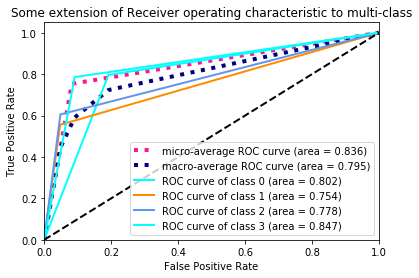

In [5]:
##0.3部分ROC
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from scipy import interp
from itertools import cycle
n_class = [0,1,2,3]
y_one_hot = label_binarize(Y_test, n_class)
y_two_hot = label_binarize(Y_pred_1, n_class)
n_classes = y_one_hot.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_one_hot[:, i].ravel(), y_two_hot[:, i].ravel())
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
#方法1
fpr["micro"], tpr["micro"], _ = roc_curve(y_one_hot.ravel(), y_two_hot.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
print("micro：",roc_auc["micro"])
#方法2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])
print("macro：",roc_auc["macro"])

#绘图
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.3f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.3f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.3f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


Done.
confusion_matrix: 
[[591   4   5  25]
 [  9  59   3   2]
 [ 12   4 137   7]
 [ 33   1   6 341]]
Done.
cohen_kappa_score: 0.856740
micro： 0.940274414851
macro： 0.919601713231


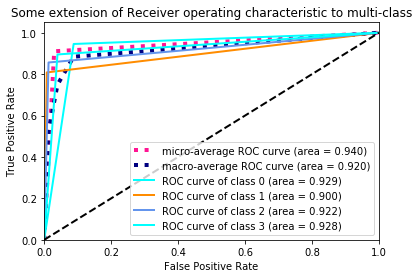

In [6]:
#Y的结果预测值
Y_pred = classifier.predict(X_train[:,2:])
#多分类
#Y_pred_p = classifier.predict_proba_dict(X_test[:,2:])[:]
#转换成数组
Y_pred = np.array(Y_pred)
Y_test_1 = np.array(Y_train)
#Y_pred_p = np.array(Y_pred_p)
Y_pred_1 = np.reshape(Y_pred,(len(Y_pred),1))
Y_test_1 = np.reshape(Y_test_1,(len(Y_test_1),1))
#Y_pred_p = np.reshape(Y_pred_p,(len(Y_pred_p),1))
print('Done.\nconfusion_matrix: ' )
print(confusion_matrix(Y_train, Y_pred))
print('Done.\ncohen_kappa_score: %f' % cohen_kappa_score(Y_train, Y_pred))

##0.7部分ROC
n_class = [0,1,2,3]
y_one_hot = label_binarize(Y_test_1, n_class)
y_two_hot = label_binarize(Y_pred_1, n_class)
n_classes = y_one_hot.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_one_hot[:, i].ravel(), y_two_hot[:, i].ravel())
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
#方法1
fpr["micro"], tpr["micro"], _ = roc_curve(y_one_hot.ravel(), y_two_hot.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
print("micro：",roc_auc["micro"])
#方法2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])
print("macro：",roc_auc["macro"])

#绘图
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.3f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.3f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.3f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [5]:
#Y_test_1
all_save_data = np.concatenate((X_test,Y_test_1),axis=1)
mode=0
if mode==0:
    all_save_data = np.concatenate((all_save_data,Y_pred_1),axis=1)
else:
    all_save_data = np.concatenate((all_save_data,Y_pred_p),axis=1)
all_save_data_pd = pd.DataFrame(all_save_data,columns=['x','y','road','PGA',
 'river','fault','lithology','NDVI','Ht','landslide','predict'])
 # np.savetxt('data.csv',all_save_data,delimiter=',')
all_save_data_pd.to_csv('churoc.csv',index=True)
# y_test_1.shape

In [6]:
# Test
y_pred = classifier.predict(x_[:,2:])
#y_pred_p = classifier.predict_proba(x_[:,2:])[:,1]
y_pred = np.array(y_pred)
y_test_1 = np.array(y_)
#y_pred_p = np.array(y_pred_p)
y_pred_1 = np.reshape(y_pred,(len(y_pred),1))
y_test_1 = np.reshape(y_test_1,(len(y_test_1),1))
#y_pred_p = np.reshape(y_pred_p,(len(y_pred_p),1))

In [7]:
all_save_data = np.concatenate((res,y_test_1),axis=1)
mode=0
if mode==0:
    all_save_data = np.concatenate((all_save_data,y_pred_1),axis=1)
else:
    all_save_data = np.concatenate((all_save_data,y_pred_p),axis=1)
all_save_data_pd = pd.DataFrame(all_save_data,columns=['x','y','road','PGA',
 'river','fault','lithology','NDVI','Ht','landslide','predict'])
 # np.savetxt('data.csv',all_save_data,delimiter=',')
all_save_data_pd.to_csv('result4.csv',index=True)
# y_test_1.shape